In [26]:
import matplotlib.pyplot as plt
import numpy as np
from lacbox.io import load_pwr
from pathlib import Path


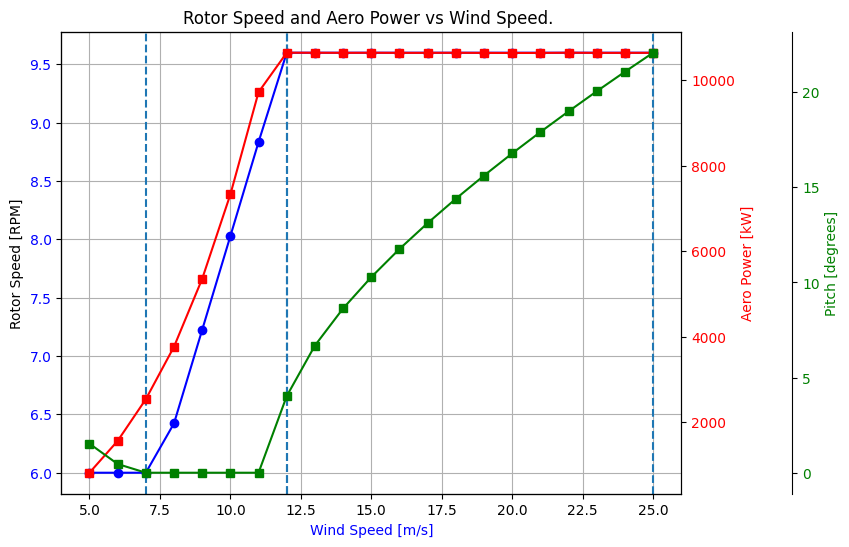

In [27]:
#script_dir = Path(__file__).parent
dtu_path = 'dtu_10mw/res_hawc2s/dtu_10mw_hawc2s_21wsp_ctrltune.pwr'
dtu_data = load_pwr(dtu_path)
#print(dtu_data.keys())

#regions = [2,3,5,13]        # from lecture, does not make sense
regions = [3,8,8,21]        # from detected regions, in log file

fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot wind speed vs rotor speed
ax1.plot(dtu_data['V_ms'], dtu_data['Speed_rpm'],  'b-o', label='Rotor Speed [RPM]')
ax1.set_ylabel('Rotor Speed [RPM]')
ax1.set_xlabel('Wind Speed [m/s]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for aerodynamic power
ax2 = ax1.twinx()
ax2.plot(dtu_data['V_ms'], dtu_data['P_kW'], 'r-s', label='Aero Power [kW]')
ax2.set_ylabel('Aero Power [kW]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for aerodynamic power
ax3 = ax1.twinx()
ax3.plot(dtu_data['V_ms'], dtu_data['Pitch_deg'], 'g-s', label='Pitch [degrees]')
ax3.set_ylabel('Pitch [degrees]', color='g')
ax3.tick_params(axis='y', labelcolor='g')
ax3.spines['right'].set_position(('outward', 80))  # Offset by 120 points

# add regions
for i in regions:
    ax1.axvline(x=dtu_data['V_ms'][i-1], linestyle='--')

# Add grid and titles
plt.title('Rotor Speed and Aero Power vs Wind Speed. ')
ax1.grid(True)

plt.show()


In [28]:
'''
data = load_oper("C:/Users/mathe/OneDrive - Centrale Lille/Documents/Scolarship/_46320 Loads, Aerodynamics and Control of Wind Turbines/Assignments/LAC_repo/assignment_3/dtu_10mw/data/Group1_redesign_flex.opt")
print(data)

wind_speed =data['ws_ms']#[i for i in range(len(data['ws_ms']))]
rotor_speed = data['rotor_speed_rpm']
aero_power = data['power_kw']
pitch = data['pitch_deg']
# Create the plot with a secondary y-axis for power
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot wind speed vs rotor speed
ax1.plot(wind_speed, rotor_speed,  'b-o', label='Rotor Speed [RPM]')
ax1.set_ylabel('Rotor Speed [RPM]')
ax1.set_xlabel('Wind Speed [m/s]', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for aerodynamic power
ax2 = ax1.twinx()
ax2.plot(wind_speed, aero_power, 'r-s', label='Aero Power [kW]')
ax2.set_ylabel('Aero Power [kW]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Create a second y-axis for aerodynamic power
ax3 = ax1.twinx()
ax3.plot(wind_speed, pitch, 'g-s', label='Pitch [degrees]')
ax3.set_ylabel('Pitch [degrees]', color='g')
ax3.tick_params(axis='y', labelcolor='g')

# Add grid and titles
plt.title('Rotor Speed and Aero Power vs Wind Speed. ')
ax1.grid(True)

plt.show()
'''


'\ndata = load_oper("C:/Users/mathe/OneDrive - Centrale Lille/Documents/Scolarship/_46320 Loads, Aerodynamics and Control of Wind Turbines/Assignments/LAC_repo/assignment_3/dtu_10mw/data/Group1_redesign_flex.opt")\nprint(data)\n\nwind_speed =data[\'ws_ms\']#[i for i in range(len(data[\'ws_ms\']))]\nrotor_speed = data[\'rotor_speed_rpm\']\naero_power = data[\'power_kw\']\npitch = data[\'pitch_deg\']\n# Create the plot with a secondary y-axis for power\nfig, ax1 = plt.subplots(figsize=(8, 6))\n\n# Plot wind speed vs rotor speed\nax1.plot(wind_speed, rotor_speed,  \'b-o\', label=\'Rotor Speed [RPM]\')\nax1.set_ylabel(\'Rotor Speed [RPM]\')\nax1.set_xlabel(\'Wind Speed [m/s]\', color=\'b\')\nax1.tick_params(axis=\'y\', labelcolor=\'b\')\n\n# Create a second y-axis for aerodynamic power\nax2 = ax1.twinx()\nax2.plot(wind_speed, aero_power, \'r-s\', label=\'Aero Power [kW]\')\nax2.set_ylabel(\'Aero Power [kW]\', color=\'r\')\nax2.tick_params(axis=\'y\', labelcolor=\'r\')\n\n# Create a second 

In [29]:
rho = 1.225
R = 92.52423873284587
CP_max = 0.4414323017299089
lambda_opt = 7.2631578947368425
eta = 1
Power = 10638.3E+03
V = 11.122788574520852 #m/s
rot_speed = lambda_opt/R*V
omega_T = 0.05*2*np.pi

omega_P = 0.06*2*np.pi

zeta = 0.7

#Taken from the dtu_10mw_hawc2s_ctrl_ctrl_tuning.txt
"""WE MIGHT HAVE TO CHANGE THOSE VALUES"""
I = 0.161050E+09
dqdtheta = -1044.85156E+03*180/(np.pi)

K_opt = (eta * rho * np.pi * R**5 * CP_max / (2 * lambda_opt**3))


K_I_T = eta*(I)*omega_T**2

K_P_T = eta*(2*(I)*omega_T*zeta)

K_I_P = -(I)*omega_P**2/dqdtheta

K_P_P = -(2*(I)*omega_P*zeta+Power/rot_speed**2)/dqdtheta

print(K_opt, K_P_T,K_I_T,K_P_P,K_I_P)

15032154.17367775 70833489.56048906 15894997.88795441 1.6529428050185775 0.3823364811255895
